# Lab 7. Image processing
# Task 7.1 Face Detection
## Problem Descriptions
This task aims to build a Haar cascade detector to detect faces from an input image. The Haar cascade detector was introduced in 2001 and it is still one of the fastest detectors until now. It detects the face by Haar-like feature which extracts features effectively and employs a cascade of a classifier to quickly reject non-face regions.

#### Process of face detection using Haar cascade detector
1. Grayscale conversion: The input image is converted to a grayscale to
   reduce computational complexity since colour information is not necessary, only dark pixels and white pixels are required for Haar-like feature extraction.

![picture](https://github.com/mengheng02/image-file/blob/main/im.png?raw=true)

2. Image integration: The integral image of the grayscale image is calculated to speed up the computation of Haar-like features.

![picture](https://raw.githubusercontent.com/mengheng02/image-file/main/haar%20value.webp)
3. Haar-like feature calculation and extraction:
 * The darker areas in the haar feature are pixels with values 1, and the
lighter areas are pixels with values 0. Each of these is responsible for finding out one particular feature in the image. The haar feature is calculated by the difference between average total pixel values at the lighter region and the darker region.

 * The calculated result is known as the Haar value. If the Haar value is close  to 1, that indicates an edge or sudden change area is detected: If it is far from 1, that indicates no edge is detected

 * During feature extraction, the Haar feature traverses the whole image to capture graphic information such as edges, and area where there is a sudden change in pixel intensities.

 *  With the use of an integral image, the computation load for Haar feature extraction and calculation are significantly reduced because only 6 values are required from each light region and dark region of Haar features to calculate the Haar value.

4. Training a classifier: A defined feature set has a large amount of Haar features, those features are applied to positive and negative samples of the face during the training phase of the machine learning classifier. The machine learning classifier will select a subset of Haar-like features that are most effective in differentiating between face-region and non-face region. This process rejects the majority of Haar features that don't work well with the facial feature, only a small amount of best Haar features are deployed to the face detection classifier, therefore saving lots of computation.

5. Designing cascade of classifier: Selected classifiers are organized into a cascade structure with multiple stages, each stage consists of a set of classifiers. If a region fails to pass a stage, it is rejected and won't be tested for the rest of the stages. Therefore, the cascade structure is designed to which the stages progress, the complexity of classifiers increases to quickly reject non-face regions at the early stage and only focus complex classifiers on face region.

By looking at each process of face detection using the Haar cascade classifier, the computational load of image processing has been drastically reduced by the efficiency of Haar-like features extraction , filtering of weak Haar-like features during training, and quick rejection of non-face regions by cascade of classifiers at the early stage.

##Implementation and Results

In [ ]:
!pip install opencv-python
import cv2
from google.colab.patches import cv2_imshow

In [ ]:
# Load the face detection model from the model file
!wget 'https://github.com/yongminli/data/raw/main/haarcascade_frontalface_default.xml'
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

--2023-12-27 02:02:00--  https://github.com/yongminli/data/raw/main/haarcascade_frontalface_default.xml
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/yongminli/data/main/haarcascade_frontalface_default.xml [following]
--2023-12-27 02:02:00--  https://raw.githubusercontent.com/yongminli/data/main/haarcascade_frontalface_default.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 930127 (908K) [text/plain]
Saving to: ‘haarcascade_frontalface_default.xml’

haarcascade_frontal 100%[===================>] 908.33K  --.-KB/s    in 0.05s   

2023-12-27 02:02:00 (18.8 MB/s) - ‘haarcascade_frontalface_de

In [ ]:
# Load the model file and image files to Google Colab
from google.colab import files
file = files.upload()

Saving Screenshot (894).png to Screenshot (894).png


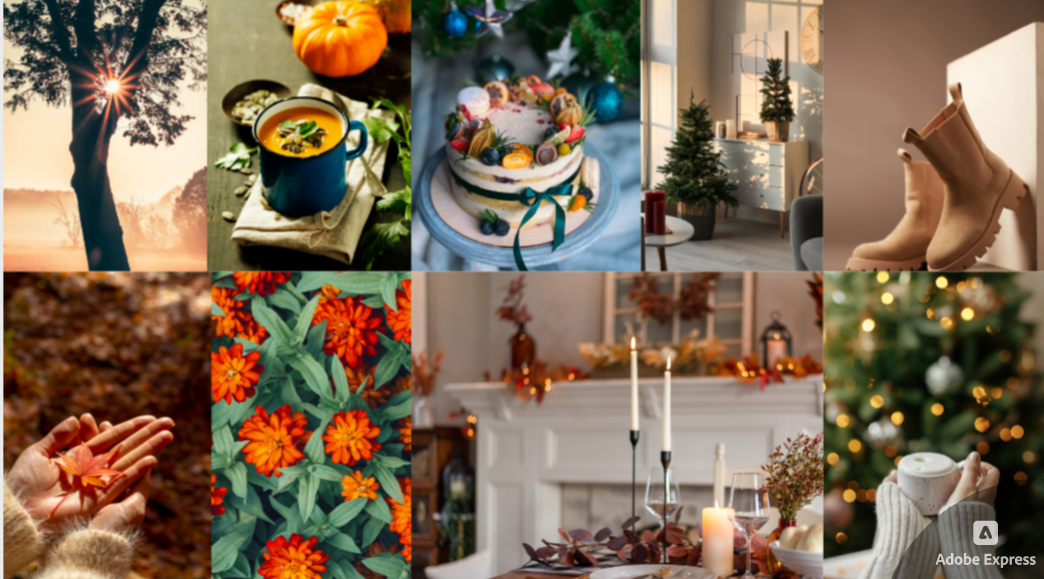

In [ ]:
# Read an input image
img = cv2.imread('Screenshot (894).png')

# Convert it into a grayscale image
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Detect faces
# faces = face_cascade.detectMultiScale(image=gray, scaleFactor=1.2, minNeighbors=5, minSize=(50,50))
faces = face_cascade.detectMultiScale(image=gray, minNeighbors=5)

# Display the detecition results
for (x, y, w, h) in faces:
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)
cv2_imshow(img)

##Discussions
In this task, we have built a Haar cascade detector and the performance is tested with pictures of various conditions, which include frontal faces, non-frontal faces, bright lighting, dark lighting, non-face, and animal faces.

1. Using frontal image
![picture](https://github.com/mengheng02/image-file/blob/main/detected%20frontal%20face.png?raw=true)

 There are 32 observations of different front faces. Haar cascade detector has successfully detected and located all 32 frontal faces, but with one false positive (it did detect the face but the box doesn't surround the face very well).

2. Using non-frontal image

![picture](https://github.com/mengheng02/image-file/blob/main/detected%20many%20non-frontal%20face.png?raw=true)

 There are 21 observations of faces at different angles. Haar cascade detector has successfully detected and located 16 out of 21 faces, with 5 false negatives and 1 false positive. When the face is turned closer to 45-degree angles, face detection becomes harder and a false negative is likely to occur.

3. Using bright lighting image
![picture](https://github.com/mengheng02/image-file/blob/main/detected%20light%20image.png?raw=true)

  Haar cascade detector successfully detected and located 5 faces out of 6 faces, with 2 false positives and 1 false negative. The false negative might be due to the difficulty in detecting the absolute side face. Besides that, it is likely to produce false positives in the high-brightness part.

4. Using dark lighting image
![picture](https://github.com/mengheng02/image-file/blob/main/detected%20dark%20image.png?raw=true)

From the output image, we can infer that the Haar cascade detector is unreliable for detecting faces in dark lighting conditions. It only correctly located and detected 2 faces out of 7, with 5 false negatives. The potential reason might be that the difference in pixel intensity becomes smaller in dark lighting conditions, which makes edge detection harder.

4. Using non-face image
![picture](https://github.com/mengheng02/image-file/blob/main/detected%20non-face%20image.png?raw=true)

Haar cascade detector is effective in rejecting non-face images. It achieve true negative in all 9 non-face image.

5. Using animal face

![picture](https://github.com/mengheng02/image-file/blob/main/resize%20detected%20animal%20faces.png?raw=true)


Haar cascade detector only correctly detects and locates 2 out of 25 animal faces, with 23 false negatives and 1 false positive. We can accept the result because the Haar cascade detector is designed for detecting human faces, rather than animal faces.

In a conclusion, the Haar cascade is excellent in detecting frontal faces in good lighting conditions and rejecting non-face images. It is also reliable in detecting non-frontal faces but only for small turning angle, as the false negative is likely to occured when the face is turned to the side at big angle. There is improvement required in detecting faces in dark lighting condition and detecting animal faces.
